# Chessboard puzzle
https://www.youtube.com/watch?v=as7Gkm7Y7h4

- Gavin and Jamie came up with a slicing algorithm based on a simple solution for a 2x2 grid where the coin is hidden in location (r,c).
- We can use the parity of the top row to determine r and the parity of the first column to determine c
- Any combination can be achieved by flipping a coin in the top row or column and if they are correct, you flip the bottom right coin, which has no impact.
- The idea generalises to the 8x8 chessboard as follows
- First apply the 2x2 algorithm to the four quadrants of the board
- This can be achieved by flipping one of the 16 coins in the top left, top right or bottom left quadrants
- This narrows down the location to 16 squares and we can choose one of 16 coins to flip
- For the second step, imagine the four quadrants piled on top of each other in layers
- Apply the 2x2 algorithm using the topmost two rows and the leftmost two columns, looking down through all four layers. This ignores the squares in the bottom right sub-quadrants
- This narrows the location down to 4 squares and we can chose between 4 squares to flip
- Repeat the second step using layers of 4 by 4 squares to narrow down to one final square

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## First set up a numbering scheme for the squares
The calculations can be vastly simplified by setting up a convenient number scheme for the squares. We link the position of the square to its coordinates in base 4. Each quadrant is labels 0,1,2,3, recursively. We will call this scheme n.

In [24]:
n = np.arange(4).reshape(2,2)
n = np.append(np.stack([n,n+4],axis=1).reshape(2,4),np.stack([n+8,n+12],axis=1).reshape(2,4),axis=0)
n = np.stack([n,n+16,n+32,n+48],axis=0)
n

array([[[ 0,  1,  4,  5],
        [ 2,  3,  6,  7],
        [ 8,  9, 12, 13],
        [10, 11, 14, 15]],

       [[16, 17, 20, 21],
        [18, 19, 22, 23],
        [24, 25, 28, 29],
        [26, 27, 30, 31]],

       [[32, 33, 36, 37],
        [34, 35, 38, 39],
        [40, 41, 44, 45],
        [42, 43, 46, 47]],

       [[48, 49, 52, 53],
        [50, 51, 54, 55],
        [56, 57, 60, 61],
        [58, 59, 62, 63]]])

### This is resulting the numbering of the squares on the chessboard

In [81]:
board = np.append(np.append(n[0],n[1],axis=1),np.append(n[2],n[3],axis=1),axis=0)
board

array([[ 0,  1,  4,  5, 16, 17, 20, 21],
       [ 2,  3,  6,  7, 18, 19, 22, 23],
       [ 8,  9, 12, 13, 24, 25, 28, 29],
       [10, 11, 14, 15, 26, 27, 30, 31],
       [32, 33, 36, 37, 48, 49, 52, 53],
       [34, 35, 38, 39, 50, 51, 54, 55],
       [40, 41, 44, 45, 56, 57, 60, 61],
       [42, 43, 46, 47, 58, 59, 62, 63]])

## 2x2 algorithm

In [5]:
def squareID(Row,Column):
    """Takes 2 slices that can be multidimensional
    first slice is a row and second slice is a column
    and returns the square they point to
    parity of rows gives row and parity of columns goves colum
    partity obtain by by adding XOR (1+sum)%2"""
    return Row.sum()%2 + Column.sum()%2 *2
            
def flip(From,To):
            """Which slice to flip to change squareID from From to To"""
            flipper = [[3,1,2,0],
                       [1,3,0,2],
                       [2,0,3,1],
                       [0,2,1,3]]
            return flipper[From][To]
            

In [6]:
squareID(np.array([0,0]),np.array([0,0]))
#squareID(slices),flip(squareID(slices),3)

0

## A base conversion function

It will be helpful to convert to base 4 indentify locations according to slices and to base 2 to define rows and columns according to the 2x2 algrorithm

In [7]:
def base(coin,base=4,l=3):
    """Convert a base 10 number to desired base returning array length l """
    based = [] if coin>0 else [0]
    while coin>0:
        based += [coin%base]
        coin = coin//base
    based = [0]*(l-len(based))+list(reversed(based))
    return based

# Algorithm

In [15]:
def solve(coins, hidden):
    """Calculate location of coin to flip"""
    hidden4 = base(hidden,4,3)
    coinsN = coins[n]
    Q1 = squareID(coinsN[:2,:4,:],  coinsN[::2,:,:4])
    Q2 = squareID(coinsN[:,0:2,:], coinsN[:,:,0:2])
    Q3 = squareID(coinsN[:,::2,:], coinsN[:,:,::2])
    print(f'Initial parities [{Q1}, {Q2}, {Q3}] locating {16*Q1+4*Q2+Q3}') 
    square = np.array([flip(i,j) for i,j in zip([Q1,Q2,Q3],hidden4)])
    print(f'Flip coin {(square*np.array([16,4,1])).sum()} to obtain new parities: {list(base(hidden,4,3))} locating key at {hidden}')
    return(square*np.array([16,4,1])).sum()


# Generate a random set of coins and hide the key

Initial parities [1, 0, 1] locating 17
Flip coin 15 to obtain new parities: [2, 0, 1] locating key at 33
[[ 0  1  4  5 16 17 20 21]
 [ 2  3  6  7 18 19 22 23]
 [ 8  9 12 13 24 25 28 29]
 [10 11 14 15 26 27 30 31]
 [32 33 36 37 48 49 52 53]
 [34 35 38 39 50 51 54 55]
 [40 41 44 45 56 57 60 61]
 [42 43 46 47 58 59 62 63]]


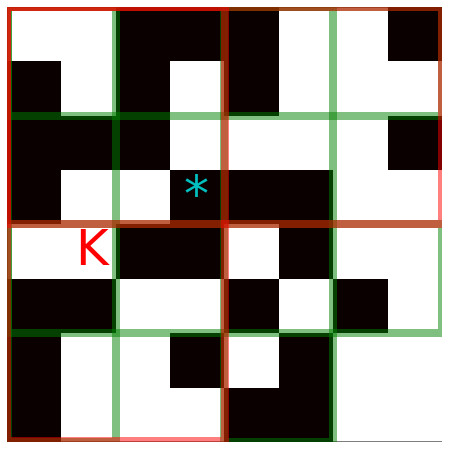

In [199]:
coins = np.random.choice([0,1],64)
hidden = np.random.choice(np.arange(64))
f = solve(coins,hidden)

fpos = np.flip(np.argwhere(board==f)[0])+np.array([-0.25,0.25])
kpos = np.flip(np.argwhere(board==hidden)[0])+np.array([-0.25,0.25])


rect1 = plt.Rectangle((-0.5,-0.5),7.99,4,fill=None,edgecolor="r", alpha=0.5,lw=8)
rect2 = plt.Rectangle((-0.5,-0.5),4,7.99,fill=None,edgecolor="r", alpha=0.5,lw=8)
rect3 = plt.Rectangle((-0.49,-0.49),7.99,2,fill=None,edgecolor="g", alpha=0.5,lw=8)
rect4 = plt.Rectangle((-0.49,-0.49),2,7.99,fill=None,edgecolor="g", alpha=0.5,lw=8)
rect5 = plt.Rectangle((-0.49,3.49),7.99,2,fill=None,edgecolor="g", alpha=0.5,lw=8)
rect6 = plt.Rectangle((3.49,-0.49),2,7.99,fill=None,edgecolor="g", alpha=0.5,lw=8)

fig, ax = plt.subplots(figsize=(8,8))
ax.add_patch(plt.Rectangle((-0.5,-0.5),7.99,7.99,fill=None,edgecolor="k", alpha=0.5,lw=1))
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect1)
ax.add_patch(rect2)


plt.axis('off')
ax.imshow(coins.reshape(8,8),cmap='hot');
ax.text(*fpos,'*',c='c',fontsize=50);
ax.text(*kpos,'K',c='r',fontsize=50);

print(board)

# Notes - checking that slices select the correct elements

In [198]:
# Quadrants of 16
b[:2,:4,:], b[::2,:,:4]

(array([[[ 0,  1,  4,  5],
         [ 2,  3,  6,  7],
         [ 8,  9, 12, 13],
         [10, 11, 14, 15]],
 
        [[16, 17, 20, 21],
         [18, 19, 22, 23],
         [24, 25, 28, 29],
         [26, 27, 30, 31]]]), array([[[ 0,  1,  4,  5],
         [ 2,  3,  6,  7],
         [ 8,  9, 12, 13],
         [10, 11, 14, 15]],
 
        [[32, 33, 36, 37],
         [34, 35, 38, 39],
         [40, 41, 44, 45],
         [42, 43, 46, 47]]]))

In [291]:
# First 2 rows and first 2 colums
b[:,0,:], b[:,:,0]

(array([[ 0,  1,  4,  5],
        [16, 17, 20, 21],
        [32, 33, 36, 37],
        [48, 49, 52, 53]]), array([[ 0,  2,  8, 10],
        [16, 18, 24, 26],
        [32, 34, 40, 42],
        [48, 50, 56, 58]]))

In [293]:
# Quadrants of 1 rows and columns
b[:,::2,:], b[:,:,::2]

(array([[[ 0,  1,  4,  5],
         [ 8,  9, 12, 13]],
 
        [[16, 17, 20, 21],
         [24, 25, 28, 29]],
 
        [[32, 33, 36, 37],
         [40, 41, 44, 45]],
 
        [[48, 49, 52, 53],
         [56, 57, 60, 61]]]), array([[[ 0,  4],
         [ 2,  6],
         [ 8, 12],
         [10, 14]],
 
        [[16, 20],
         [18, 22],
         [24, 28],
         [26, 30]],
 
        [[32, 36],
         [34, 38],
         [40, 44],
         [42, 46]],
 
        [[48, 52],
         [50, 54],
         [56, 60],
         [58, 62]]]))